## Réseaux de neurones
Commençons par générer des données impossibles à classifier par un Perceptron simple-couche

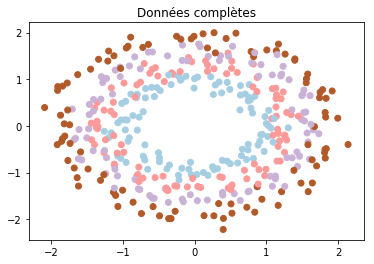

In [152]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

samples_per_class = 100
num_classes = 4
angles = np.linspace(0, 2*np.pi, samples_per_class)
radius = 1.0 + np.arange(num_classes) * 0.3
px = np.cos(angles[:, None]) * radius[None, :]  # (100, 3)
py = np.sin(angles[:, None]) * radius[None, :]  # (100, 3)
X_ = np.stack([px, py], axis=-1).reshape((samples_per_class * num_classes, 2))
X_ += np.random.randn(len(X_[:, 0]),2)/8
y_ = np.array(list(range(num_classes)) * samples_per_class)

plt.figure()
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=plt.cm.Paired)
plt.title('Données complètes')

plt.show()

Puis on les sépare en ensembles d'entraînement et de test

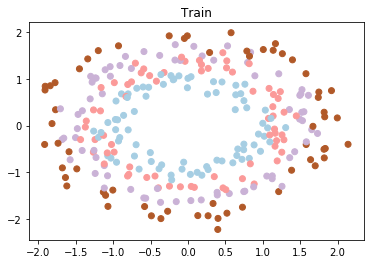

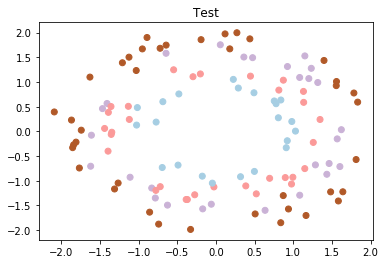

In [153]:
train_proportion = 0.7
num_train = int(len(X_) * train_proportion)

np.random.seed(0)
idx = np.random.permutation(len(X_))

train_idx = idx[:num_train]
test_idx = idx[num_train:]

X_train = X_[train_idx]
y_train = y_[train_idx]
X_test = X_[test_idx]
y_test = y_[test_idx]

# Affichons maintenant les données d'entraînement, de validation et de test.
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Train')
plt.show()

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Test')
plt.show()

Voici l'implémentation du réseau de neurones que vous devrez compléter. Le réseau a 4 couches puisqu'ils contiens deux couches cachées (donc deux non-linéaritées), la couche d'entrée et la couche de sortie.

In [136]:
class FourLayerNet:    

    def __init__(self, input_dim,hidden_nodes,output_dim=2, reg_lambda=0.01, learning_rate=0.01):
        model = {}
        input_dim = input_dim
        model['W1'] = np.random.randn(input_dim, hidden_nodes) * np.sqrt(0.1 / (input_dim + hidden_nodes))
        model['b1'] = np.zeros((1, hidden_nodes))
        model['W2'] = np.random.randn(hidden_nodes, hidden_nodes) * np.sqrt(0.1 / (hidden_nodes + hidden_nodes))
        model['b2'] = np.zeros((1, hidden_nodes))
        model['W3'] = np.random.randn(hidden_nodes, output_dim) * np.sqrt(0.1 / (hidden_nodes + output_dim))
        model['b3'] = np.zeros((1, output_dim))
        self.model = model
        self.reg_lambda = reg_lambda
        self.learning_rate = learning_rate

    def relu(self, X):
        return np.maximum(X, 0)

    def relu_derivative(self, X):
        return 1. * (X > 0)

    def feed_forward(self, x):
        # TODO: Calculer la "forward pass"
        W1, b1, W2, b2, W3, b3 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2'], self.model['W3'], self.model['b3']
        # zi est l'entrée au neurone, ce qui est donné à la non-linéaritée
        # ai est la sortie de la non-linéaritée
        # out est le softmax en sortie du réseau
        return z1, a1, z2, a2, z3, out

    def calculate_loss(self, X,y):
        num_examples = X.shape[0]
        W1, b1, W2, b2, W3, b3 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2'], self.model['W3'], self.model['b3']
        # Forward propagation to calculate our predictions
        z1, a1, z2, a2, z3, out = self.feed_forward(X)
        probs = out / np.sum(out, axis=1, keepdims=True)
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(num_examples), y])
        loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
        loss += self.reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
        
        # Calculate accuracy
        accuracy = np.average((self.predict(X) == y))
        
        return 1./num_examples * loss, accuracy

    def backprop(self, X,y,z1,a1,z2,a2,z3,output):
        delta3 = output
        delta3[range(X.shape[0]), y] -= 1  #yhat - y
        dW3 = (a2.T).dot(delta3)
        db3 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(self.model['W3'].T) * self.relu_derivative(a2) #if ReLU
        dW2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = delta2.dot(self.model['W2'].T) * self.relu_derivative(a1) #if ReLU
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        # Add regularization terms
        dW3 += self.reg_lambda * self.model['W3']
        dW2 += self.reg_lambda * self.model['W2']
        dW1 += self.reg_lambda * self.model['W1']
        return dW1, dW2, dW3, db1, db2, db3


    def train(self, X, y, epochs=1000):
        # Batch gradient descent
        done = False
        i = 0
        losses = []
        accuracies = [] 
        while i < epochs:
            # TODO: Faire la boucle d'entraînement           
            loss, acc = self.calculate_loss(X, y)
            accuracies.append(acc)
            losses.append(loss)
            i += 1
        return losses, accuracies
    
    def predict(self, X):        
        # TODO: Faire la prédiction du réseau
        return preds

Quelques sanity-checks:
   - On veut s'assurer que le réseau initial prédit du "bruit". C'est à dire une probabilité égale pour toutes les classes
   - On veut s'assurer qu'on peut overfitter sur quelques données

In [154]:
# Sanity check: Le réseaux non-entrainé devrait retourner une probabilité égale pour toutes les classes

learning_rate = 0.1 # learning rate for gradient descent
reg_lambda = 0.001 # regularization strength
epochs = 100

model = FourLayerNet(2,10,num_classes, reg_lambda, learning_rate)
loss_attendu = -np.log(1.0/num_classes)
loss, accuracy = model.calculate_loss(X_train, y_train)
print('Sortie: {}  Attendu: {}'.format(loss, loss_attendu))
if abs(loss - loss_attendu) > 0.05:
    print('ERREUR: la sortie de la fonction est incorrecte.')
else:
    print('SUCCÈS') 

Sortie: 1.3865210794693974  Attendu: 1.3862943611198906
SUCCÈS


Accuracy d'entraînement, devrait être 1.0: 1.000
SUCCÈS


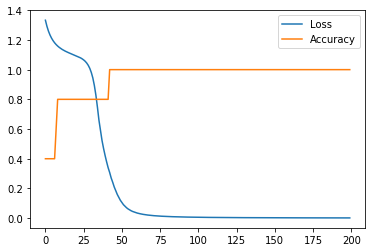

In [156]:
# Vérification: Vous devez pouvoir faire du surapprentissage sur quelques échantillons.
# Si l'accuracy reste faible, votre implémentation a un bogue.
n_check = 5
X_check = X_train[:n_check]
y_check = y_train[:n_check]
reg_lambda = 0.0
learning_rate = 0.1
model = FourLayerNet(2, 5, num_classes, reg_lambda, learning_rate)

loss_curve, accuracy_curve = model.train(X_check, y_check, epochs=200)
print('Accuracy d\'entraînement, devrait être 1.0: {:.3f}'.format(accuracy_curve[-1]))
if accuracy_curve[-1] < 0.98:
    print('ATTENTION: L\'accuracy n\'est pas 100%.')
else:
    print('SUCCÈS')
plt.plot(loss_curve)
plt.plot(accuracy_curve)
plt.legend(['Loss', 'Accuracy'])

Lorsque tous les sanity checks auront passés (vous pouvez les retenter plusieurs fois, les réseaux de neurones sont sensibles à l'initialisation), vous pourrez entraîner pour de vrai.

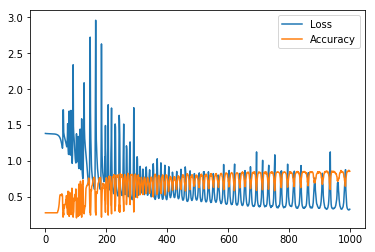

In [159]:
reg_lambda = 0.05
learning_rate = 0.005
num_hidden = 50

model = FourLayerNet(2, num_hidden, num_classes, reg_lambda, learning_rate)

loss_curve, accuracy_curve = model.train(X_train, y_train, epochs=1000)

plt.plot(loss_curve)
plt.plot(accuracy_curve)
plt.legend(['Loss', 'Accuracy'])

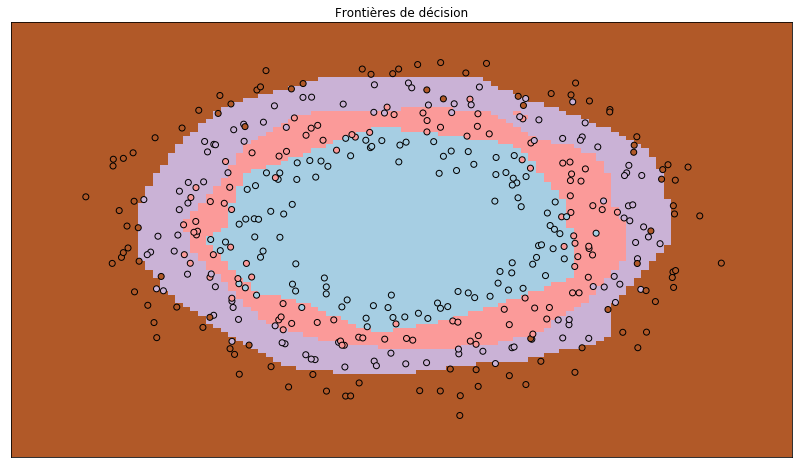

In [160]:
# Visualisation des résultats

h = 0.05  # contrôle la résolution de la grille
x_min, x_max = X_[:, 0].min() - .5, X_[:, 0].max() + .5  # Limites de la grille
y_min, y_max = X_[:, 1].min() - .5, X_[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Créer la grille

X_predict = np.c_[xx.ravel(), yy.ravel()]  # Convertir la grille en une liste de points
Z = model.predict(X_predict)  # Classifier chaque point de la grille
Z = Z.reshape(xx.shape)  # Remettre en 2D

plt.figure(figsize=(14, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)  # Colorier les cases selon les prédictions

X_plot, y_plot = X_, y_
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k', cmap=plt.cm.Paired)  # Tracer les données

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Frontières de décision')
plt.show()

Les frontières devraient bien ressembler aux données